### Dataset: Cats and dogs
### Algoritm: KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

### Подготовка данных

(1, 265, 253, 3)


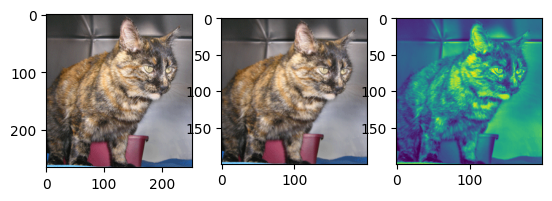

In [2]:
cat1 = io.imread("../data/PetImages/Cat/140.jpg")
print(cat1.shape)
cat1 = cat1.squeeze(0)
cat1_ = resize(cat1, (200,200,3))
cat1_gray = rgb2gray(cat1_)
fig = plt.figure()
columns = 3; rows = 1
fig.add_subplot(rows, columns, 1);plt.imshow(cat1)
fig.add_subplot(rows, columns, 2);plt.imshow(cat1_)
fig.add_subplot(rows, columns, 3);plt.imshow(cat1_gray)
plt.show()

In [16]:
x_train = []; y_train = []
for i in range(0,2000):
    cat_image = io.imread('../data/PetImages/Cat/{}.jpg'.format(i))
    if len(cat_image.shape) == 4:
        cat_image = cat_image.squeeze(0)
    cat = rgb2gray(resize(cat_image, (200,200)))
    x_train.append(cat); y_train.append(0) #0-->'cat'
    
for i in range(0,2000):
    dog_image = io.imread('../data/PetImages/Dog/{}.jpg'.format(i))
    if len(dog_image.shape) == 4:
        dog_image = dog_image.squeeze(0)
    dog = rgb2gray(resize(dog_image, (200,200)))
    x_train.append(dog); y_train.append(1) #1-->'dog'
    
x_train, y_train = np.asarray(x_train), np.asarray(y_train)
print('x_train shape: ', x_train.shape, 'y_train shape: ', y_train.shape)

x_train shape:  (4000, 200, 200) y_train shape:  (4000,)


In [27]:
x_test = []; y_test = []
for i in range(2001, 3001):
    cat_image = io.imread('../data/PetImages/Cat/{}.jpg'.format(i))
    if len(cat_image.shape) == 4:
        cat_image = cat_image.squeeze(0)
    cat = rgb2gray(resize(cat_image, (200,200)))
    x_test.append(cat); y_test.append(0) #0-->'cat'
    
for i in range(2001, 3001):
    dog_image = io.imread('../data/PetImages/Dog/{}.jpg'.format(i))
    if len(dog_image.shape) == 4:
        dog_image = dog_image.squeeze(0)
    dog = rgb2gray(resize(dog_image, (200,200)))
    x_test.append(dog); y_test.append(1) #1-->'dog'
    
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print('x_test shape: ',x_test.shape, 'y_test shape: ', y_test.shape)

x_test shape:  (2000, 200, 200) y_test shape:  (2000,)


In [28]:
def predict(X, k):
    distances = []
    for i in range(0, len(x_train)):
        distances += [np.sum(np.abs(x_train[i] - X))]
    min_indexs = np.argsort(distances)[:k]
    y_ = y_train[min_indexs]; counts = np.bincount(y_)
    if np.argmax(counts)==0:return('cat')
    else:return('dog')

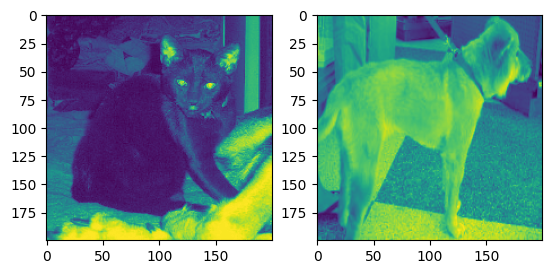

['dog', 'cat']


In [29]:
image_numbers_for_predict = [4,1089]
fig=plt.figure(); predictions=[]
columns=2;rows=1;i=1
for num in image_numbers_for_predict:
    predictions+=[predict(x_test[num],3)]
    fig.add_subplot(rows, columns, i); plt.imshow(x_test[num]); i+=1
plt.show()
print(predictions)

### Тренируем KNN

In [84]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_jobs=-1)
neigh.fit(x_train,y_train)

score_train = neigh.score(x_train,y_train)
print("Training score: {:.2f}%".format(score_train*100))

score_test = neigh.score(x_test,y_test)
print("Test score: {:.2f}%".format(score_test*100))

Training score: 70.85%
Test score: 54.65%


### [OPTIONAL] Можно добиться более высокой точности с помощью RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
import time

distances=['euclidean','cityblock']
k_values=np.arange(1, 31, 2)
parametres_grid={"n_neighbors": k_values, 'metric': distances}

grid=RandomizedSearchCV(neigh, parametres_grid)
start = time.time()
grid.fit(x_train,y_train)
print("randomized search took {:.2f} minutes".format((time.time() - start)/60))
acc = grid.score(x_test, y_test)
print("randomized search accuracy: {:.2f}%".format(acc * 100))
print("randomized search best parameters: {}".format(grid.best_params_))

### Инференс

In [82]:
def predict_image(file_path):
    cat_image = io.imread(file_path)
    if len(cat_image.shape) == 4:
        cat_image = cat_image.squeeze(0)
    cat = rgb2gray(resize(cat_image, (200,200)))
    cat = cat.reshape(1, -1)

    res = neigh.predict(cat)[0]
    if res == 0:
        print("Cat")
    else:
        print("Dog")

In [83]:
predict_image("../data/PetImages/cat/3004.jpg")

Cat
